In [ ]:
Flipkart Reviews Sentiment Analysis using Python
1.Analyze the data based on rating.
2.Analyze the data based on word frequence in reviews.
3.Analyze the data based on sentimenet i.e positive/negative/neutral of the words used in reveiew.
4.Check furthen on then which is the overall customer sentiment based on above analysis.

In [1]:
import pandas as pd
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#Vader is a sentiment analyzer tool
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
#Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 

"""Note: 
Image result for why we use import for some python packages and from for some package
The difference between import and from import in Python is: import imports the whole library. 
from import imports a specific member or members of the library."""

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [3]:
data.shape

(2304, 3)

In [4]:
#Check if data contains any null values
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [6]:
#clean and prepare the column containing reviews before heading to sentiment analysis
import nltk
"""NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP. 
A lot of the data that you could be analyzing is unstructured data and contains human-readable text. 
Before you can analyze that data programmatically, you first need to preprocess it."""

import re #regular expression pakage
nltk.download('stopwords')
"""The stopwords in nltk are the most common words in data. 
They are words that you do not want to use to describe the topic of your content. 
They are pre-defined and cannot be removed."""

stemmer = nltk.SnowballStemmer("english")
""""Stemming is the process of reducing inflection in words to their root forms such as mapping a 
group of words to the same stem even if the stem itself is not a valid word in the Language.""""

from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

"""Sample cleaning with re pakage
result = re.sub('abc',  '',    input)           # Delete pattern abc
result = re.sub('abc',  'def', input)           # Replace pattern abc -> def
result = re.sub(r'\s+', ' ',   input)           # Eliminate duplicate whitespaces using wildcards
result = re.sub('abc(def)ghi', r'\1', input)    # Replace a string with a part of itself"""

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhramdin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
ratings = data["Rating"].value_counts() #The value_counts() method returns a Series containing the counts of unique values.
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

In [10]:
"""So 60% of the reviewers have given 5 out of 5 ratings to the products they buy from Flipkart. 
Now let’s have a look at the kind of reviews people leave. For this, 
I will use a word cloud to visualize the most used words in the reviews column:"""

'So 60% of the reviewers have given 5 out of 5 ratings to the products they buy from Flipkart. \nNow let’s have a look at the kind of reviews people leave. For this, \nI will use a word cloud to visualize the most used words in the reviews column:'

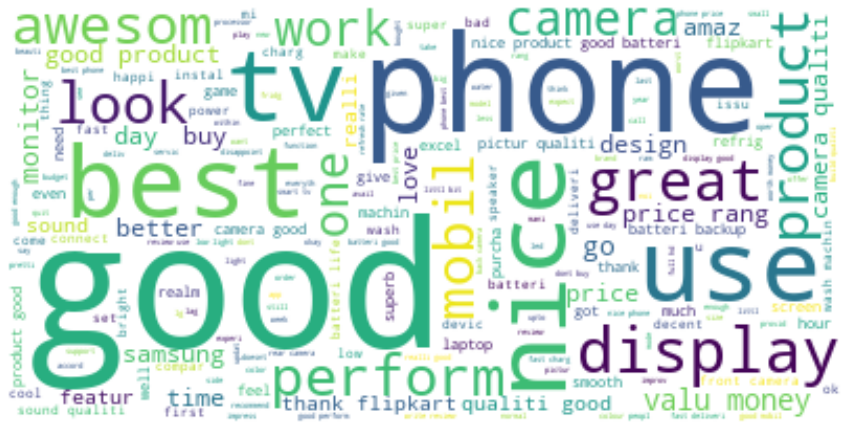

In [11]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
"""Now I will analyze the sentiments of Flipkart reviews by adding three columns in this dataset 
as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

Image result for sentimentintensityanalyzer polarity_scores
VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis 
that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. 
The sentiment score of a text can be obtained by summing up the intensity of each word in the text."""


nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saurabhramdin/nltk_data...


                                              Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


In [13]:
"""Now let’s see how most of the reviewers think about the products and services of Flipkart:"""
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [14]:
"""So most of the reviews are neutral. Let’s have a look at the total of Positive, 
Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews:"""
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.796999999999
Negative:  96.98800000000013
Neutral:  1283.2200000000012


In [ ]:
Conclusion
So, most people give Neutral reviews, and a small proportion of people give Negative reviews. 
So we can say that people are satisfied with Flipkart products and services.